# Using k-nearest neighbors and training multilayer perceptron on MNIST 
##### The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits.

# Step 1: Loading and observing the dataset

In [1]:
# https://pjreddie.com/media/files/mnist_train.csv
# https://pjreddie.com/media/files/mnist_test.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist_train = pd.read_csv('mnist_train.csv', header=None)
mnist_test = pd.read_csv('mnist_test.csv', header=None)

In [4]:
mnist_train.shape 

(60000, 785)

In [5]:
mnist_test.shape

(10000, 785)

In [6]:
mnist_train.head(5) # 1 column for label, 784 columns for pixels

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# changing the names of the columns for clarity
cols = ["label"]
for i in range(784):
    cols.append("px_{}".format(i + 1))

In [8]:
# giving the new names to the columns of our dataset
mnist_train.columns = cols 
mnist_test.columns = cols

In [9]:
mnist_train.head(5)

,label,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783,px_784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# getting a random row and its corresponding columns and saving it to a new array
image_row = mnist_train.values[45, 1:] 

In [11]:
image_row.shape

(784,)

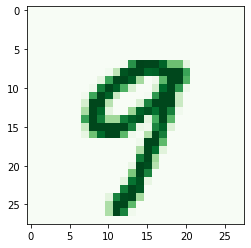

In [12]:
# demonstrating the image of the row 
plt.imshow(image_row.reshape(28,28), cmap="Greens") # reshaping it to a square 28*28 (= 784)

# Step 2: Using k-nearest neigbors algorithm on the dataset

In [13]:
from sklearn.neighbors import KNeighborsClassifier # importing k-nearest neighbors classifier

In [14]:
# saving the data about pixels to new variable
train_data = mnist_train.values[:, 1:] 
test_data = mnist_test.values[:, 1:]

In [15]:
# # saving the data about labels to new variable
train_label = mnist_train.values[:, 0]
test_label = mnist_test.values[:, 0]

In [16]:
# checking for correctness 
print(train_data.shape, test_data.shape)

(60000, 784) (10000, 784)


In [17]:
print(train_label.shape, test_label.shape)

(60000,) (10000,)


In [18]:
# creating a classifier object
kn_classifier = KNeighborsClassifier(n_jobs=-1) # n_jobs=-1 - put to use all the CPU cores of the machine

In [19]:
# using the model on our data
kn_classifier = kn_classifier.fit(train_data, train_label)

The pictire depicts number 9


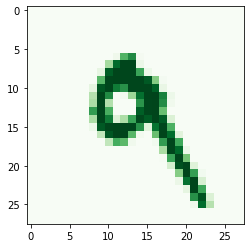

In [20]:
test_id = 7 # getting a random row to test the model

plt.imshow(test_data[test_id, :].reshape(28, 28), cmap="Greens")
print("The pictire depicts number {}".format(test_label[test_id]))

In [21]:
# predicting the number
kn_classifier.predict(test_data[test_id, :].reshape(1, 784))

array([9], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score # importing accuracy scoring

In [23]:
kn_predictions = kn_classifier.predict(test_data) # using prediction on the whole test date

In [24]:
# checking the accuracy of the model 
print("Accuracy: {}%".format(accuracy_score(test_label, kn_predictions) * 100)) 

Accuracy: 96.88%


# Step 3: Training multilayer perceptron neural network on the dataset

In [25]:
from sklearn.neural_network import MLPClassifier # importing multilayer perceptron classifier

In [26]:
# creating a classifier object
mlp_classifier = MLPClassifier(verbose=True)

In [27]:
# training the model on our data
mlp_classifier = mlp_classifier.fit(train_data, train_label)

Iteration 1, loss = 6.60338272
Iteration 2, loss = 1.10592470
Iteration 3, loss = 0.54857368
Iteration 4, loss = 0.36648982
Iteration 5, loss = 0.27408005
Iteration 6, loss = 0.22175455
Iteration 7, loss = 0.17875424
Iteration 8, loss = 0.16221438
Iteration 9, loss = 0.14248047
Iteration 10, loss = 0.13212916
Iteration 11, loss = 0.11789289
Iteration 12, loss = 0.11710869
Iteration 13, loss = 0.12044110
Iteration 14, loss = 0.10964409
Iteration 15, loss = 0.10319531
Iteration 16, loss = 0.09724851
Iteration 17, loss = 0.09197052
Iteration 18, loss = 0.10211723
Iteration 19, loss = 0.09715765
Iteration 20, loss = 0.08242766
Iteration 21, loss = 0.09619872
Iteration 22, loss = 0.08601149
Iteration 23, loss = 0.07727612
Iteration 24, loss = 0.08175851
Iteration 25, loss = 0.07136706
Iteration 26, loss = 0.06865596
Iteration 27, loss = 0.07480436
Iteration 28, loss = 0.06968418
Iteration 29, loss = 0.07053198
Iteration 30, loss = 0.06452635
Iteration 31, loss = 0.05720280
Iteration 32, los

The pictire depicts number 1


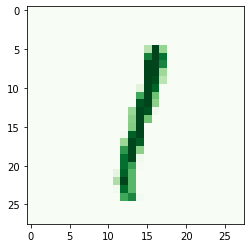

In [28]:
test_id = 57 # getting a random row to test the model

plt.imshow(test_data[test_id, :].reshape(28, 28), cmap="Greens")
print("The pictire depicts number {}".format(test_label[test_id]))

In [29]:
# predicting the number
mlp_classifier.predict(test_data[test_id, :].reshape(1, 784))

array([1], dtype=int64)

In [30]:
mlp_predictions = mlp_classifier.predict(test_data) # using prediction on the whole test date

In [31]:
# checking the accuracy of the model 
print("Accuracy: {}%".format(accuracy_score(test_label, mlp_predictions) * 100)) 

Accuracy: 96.87%
